%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(4.8, 3.95)

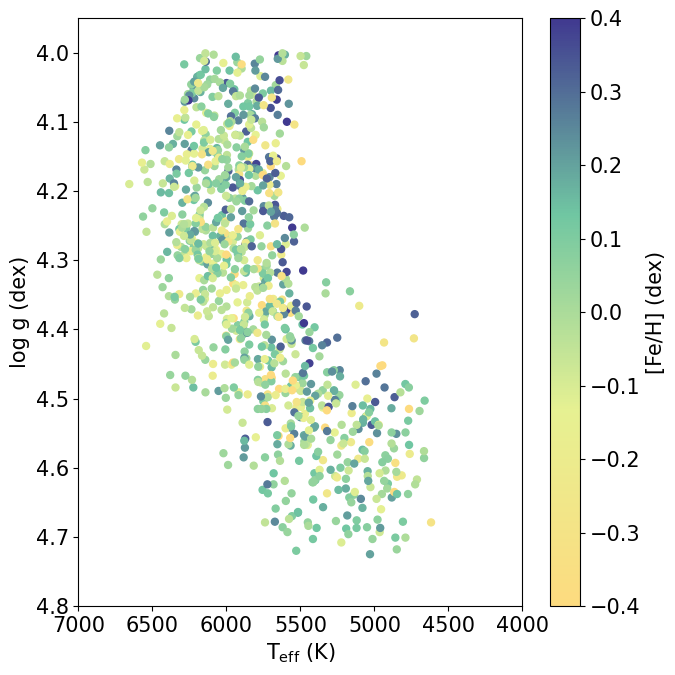

In [1]:
# HR diagram
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap_colors= ['#403990', '#70C6A2', '#E6F192', '#FDDB7F']

cmap = LinearSegmentedColormap.from_list("mycmap", cmap_colors[::-1])
#cmap = LinearSegmentedColormap.from_list("mycmap", cmap_colors)

%pylab inline
training_labels = pd.read_csv('./data/label_dataframes/training_labels.csv')

figure(figsize=(7,7))
rcParams['font.size']=15
scatter(training_labels.cks_steff, training_labels.cks_slogg,
       c=training_labels.cks_smet, s=25, cmap=cmap, vmin=-0.4,vmax=0.4)
colorbar(label='[Fe/H] (dex)')
xlabel(r'T$_{\rm eff}$ (K)')
ylabel('log g (dex)')
tight_layout()
xlim(7000,4000);ylim(4.8,3.95)

In [2]:
training_labels

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id_starname,id_kic,id_koicand,id_kepler_name,koi_disposition,koi_period,koi_period_err1,...,iso_sma,iso_sma_err1,iso_sma_err2,iso_insol,iso_insol_err1,iso_insol_err2,iso_teq,iso_teq_err1,iso_teq_err2,spectrum_fileroot
0,0,0,0,K00001,11446443,K00001.01,Kepler-1 b,CONFIRMED,2.470613,1.900000e-08,...,0.035951,0.000596,-0.000596,890.712853,184.876216,-184.876216,1392.188224,71.758330,-71.758330,122.7420
1,1,1,1,K00002,10666592,K00002.01,Kepler-2 b,CONFIRMED,2.204735,3.800000e-08,...,0.036880,0.000727,-0.000727,3029.593093,931.186264,-931.186264,1890.643307,146.140168,-146.140168,122.9200
2,2,2,2,K00003,10748390,K00003.01,Kepler-3 b,CONFIRMED,4.887803,1.770000e-07,...,0.052952,0.000883,-0.000883,116.907786,20.094411,-20.094411,837.962116,35.981752,-35.981752,122.8100
3,3,3,3,K00006,3248033,K00006.01,NaN,FALSE POSITIVE,1.334104,7.070000e-07,...,0.025383,0.000427,-0.000427,3595.445148,694.155894,-694.155894,1973.338972,95.179897,-95.179897,70.1247
4,4,4,4,K00007,11853905,K00007.01,Kepler-4 b,CONFIRMED,3.213669,1.122000e-06,...,0.044247,0.001075,-0.001075,1233.844672,367.335736,-367.335736,1510.353647,112.889880,-112.889880,74.5090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,1212,1212,1958,K04881,8094120,K04881.01,NaN,NOT DISPOSITIONED,5.679295,8.465000e-05,...,0.066177,0.001101,-0.001101,572.848502,144.283788,-144.283788,1246.733048,78.028181,-78.028181,179.4980
885,1217,1217,1963,K04907,5437762,K04907.01,NaN,NOT DISPOSITIONED,4.044849,8.795000e-05,...,0.051001,0.000856,-0.000856,746.872395,191.465164,-191.465164,1332.217481,86.174159,-86.174159,179.8840
886,1236,1236,1982,K05236,6067545,K05236.01,NaN,CANDIDATE,550.859839,8.210000e-03,...,1.329101,0.022574,-0.022574,0.742273,0.125419,-0.125419,236.539941,9.970574,-9.970574,211.7900
887,1272,1272,2018,K05900,11453930,K05900.01,NaN,FALSE POSITIVE,355.847310,2.086000e-02,...,1.041967,0.017506,-0.017506,1.972225,0.329911,-0.329911,301.996993,12.558650,-12.558650,189.2508


In [3]:
# next: one-to-one plots from leave-one-out validatoin colored by training density
# and chisq
# ...this is different than before
# maybe I'll just pot the distributions for now?
training_metrics = pd.read_csv('./data/cannon_models/rchip_orders_11-12_omitted_cannon_labels.csv')
training_metrics

,Unnamed: 0,id_starname,test_number,cks_steff,cks_slogg,cks_smet,cks_svsini,cannon_steff,cannon_slogg,cannon_smet,cannon_svsini,chisq,training_density
0,0,K00001,0,5818.8,4.400,0.012,1.3,5834.175029,4.414293,-0.011682,1.522744,2.125980e+06,0.000600
1,1,K00002,0,6448.7,4.134,0.203,5.2,6227.950060,3.979965,0.134942,5.177826,1.276879e+21,0.000219
2,2,K00003,0,4864.3,4.498,0.327,3.2,4840.133155,4.495280,0.212401,3.593871,1.071177e+15,0.000053
3,3,K00006,0,6348.1,4.357,0.044,11.8,6346.112949,4.267876,0.053306,12.509921,1.371855e+51,0.000173
4,4,K00007,0,5826.9,4.089,0.177,2.8,5812.877886,4.076747,0.170027,2.391793,7.092702e+10,0.000375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,884,K04881,4,6286.3,4.248,-0.020,9.4,6282.435954,4.232062,-0.017843,9.811442,3.680035e+39,0.000265
885,885,K04907,4,5932.7,4.215,0.035,2.9,5957.655174,4.228777,0.037247,2.541030,2.995217e+10,0.000730
886,886,K05236,4,6092.9,4.467,-0.195,3.0,5987.336239,4.313423,-0.228520,3.406426,8.610420e+13,0.000357
887,887,K05900,4,6371.4,4.398,-0.060,12.8,6346.215154,4.244110,-0.070514,12.811570,3.820503e+51,0.000113


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'number of stars')

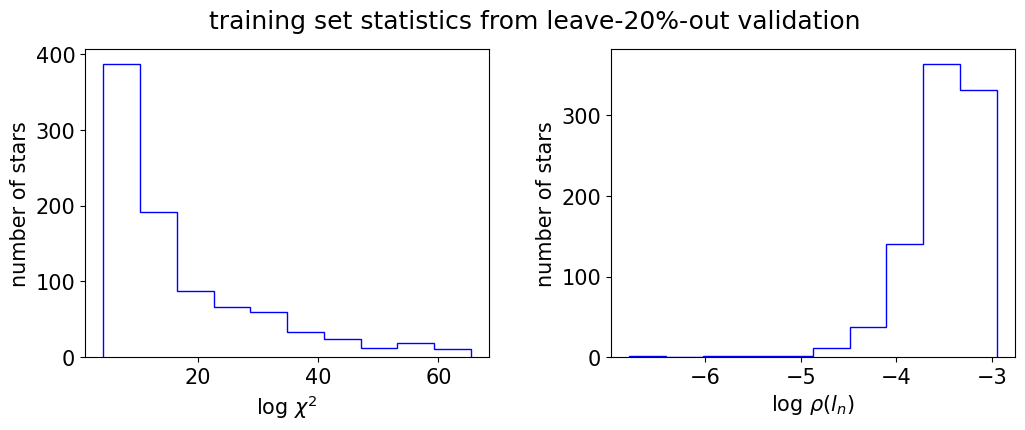

In [4]:
%pylab inline
figure(figsize=(12,4));suptitle('training set statistics from leave-20%-out validation')
subplots_adjust(wspace=0.3)
subplot(121)
hist(np.log10(training_metrics.chisq), histtype='step', color='b')
xlabel(r'log $\chi^2$');ylabel('number of stars')

subplot(122)
hist(np.log10(training_metrics.training_density), histtype='step', color='b')
xlabel(r'log $\rho$($l_n$)');ylabel('number of stars')

In [5]:
# something interesting is that the chisq is much larger
# but this might have to do with the number of pixels?
# a perfect fit should be n_pixels
# which is what?
import thecannon as tc
model = tc.CannonModel.read('./data/cannon_models/rchip_orders_11-12_omitted.model')
n_pixels = len(model(model._fiducials))
print(n_pixels)

50680


In [6]:
# find spectrum with large chisq
large_chisq = training_metrics.query('chisq>1e50').iloc[1]
large_chisq

Unnamed: 0                                                         12
id_starname                                                    K00042
test_number                                                         0
cks_steff                                                      6305.6
cks_slogg                                                       4.281
cks_smet                                                       -0.005
cks_svsini                                                       13.0
cannon_steff                                               6381.76369
cannon_slogg                                                 4.270284
cannon_smet                                                  0.032483
cannon_svsini                                               13.520583
chisq               6871703623061806287961119700773613057758762374...
training_density                                             0.000159
Name: 12, dtype: object

In [7]:
# and spectrum with nominal chisq
normal_chisq = training_metrics.query('chisq<1e20').iloc[1]
normal_chisq

Unnamed: 0                            2
id_starname                      K00003
test_number                           0
cks_steff                        4864.3
cks_slogg                         4.498
cks_smet                          0.327
cks_svsini                          3.2
cannon_steff                4840.133155
cannon_slogg                    4.49528
cannon_smet                    0.212401
cannon_svsini                  3.593871
chisq               1071177091303022.75
training_density               0.000053
Name: 2, dtype: object

In [8]:
# I need the object
# I need to get it this way
# because I specifically need the fluxes of orders11-12 omitted
# which I didn't save.
import spectrum
order_numbers = [i for i in np.arange(1,17,1).tolist() if i not in [11,12]]
for spectrum_idx in range(len(model.training_set_labels)):
    object = model.training_set_labels[spectrum_idx]
    if object[0] == large_chisq.cks_steff:
        print('large chisq object found')
        flux = model.training_set_flux[spectrum_idx]
        sigma = 1/np.sqrt(model.training_set_ivar[spectrum_idx])
        large_chisq_spec = spectrum.Spectrum(flux, sigma, order_numbers, model)
        large_chisq_spec.fit_single_star()
    elif object[0] == normal_chisq.cks_steff:
        print('normal chisq object found')
        flux = model.training_set_flux[spectrum_idx]
        sigma = 1/np.sqrt(model.training_set_ivar[spectrum_idx])
        normal_chisq_spec = spectrum.Spectrum(flux, sigma, order_numbers, model)
        normal_chisq_spec.fit_single_star()
    else:
        pass

normal chisq object found
large chisq object found


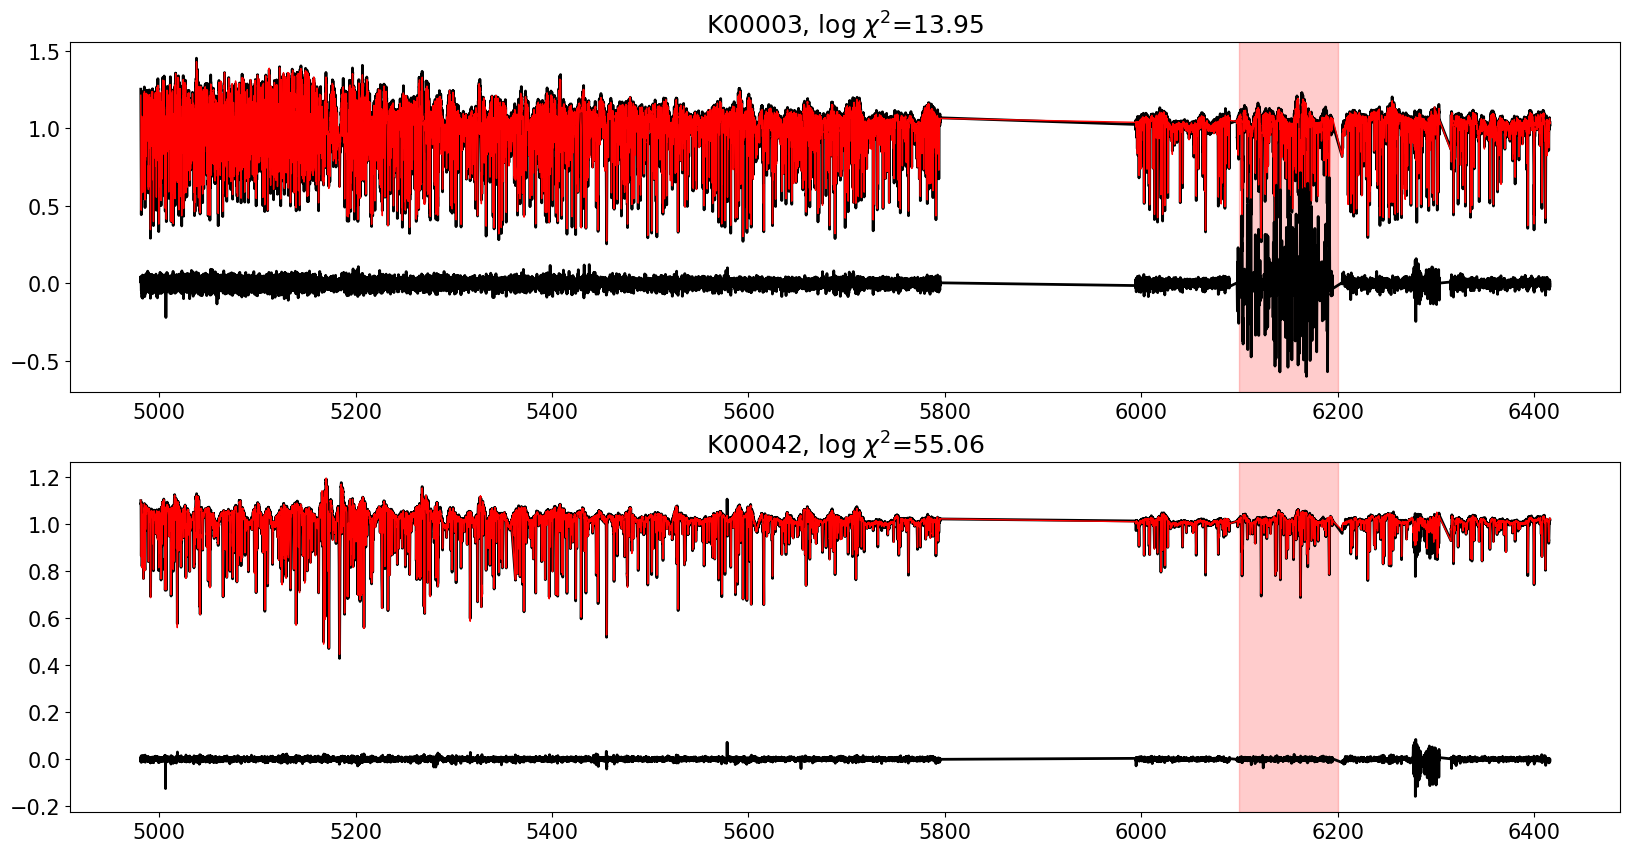

In [9]:
normal_chisq_str = r'{}, log $\chi^2$={}'.format(
    normal_chisq.id_starname,
    np.log10(normal_chisq_spec.fit_chisq).round(2))

large_chisq_str = r'{}, log $\chi^2$={}'.format(
    large_chisq.id_starname,
    np.log10(large_chisq_spec.fit_chisq).round(2))

figure(figsize=(20,10))
subplot(211);title(normal_chisq_str)
plot(normal_chisq_spec.w, normal_chisq_spec.flux, color='k', lw=2)
plot(normal_chisq_spec.w, model(normal_chisq_spec.fit_cannon_labels), 'r-', lw=1)
plot(normal_chisq_spec.w, normal_chisq_spec.flux - model(normal_chisq_spec.fit_cannon_labels), 
     color='k', lw=2)
axvspan(6100,6200,alpha=0.2,color='r')

subplot(212);title(large_chisq_str)
plot(large_chisq_spec.w, large_chisq_spec.flux, color='k', lw=2)
plot(large_chisq_spec.w, model(large_chisq_spec.fit_cannon_labels), 'r-', lw=1)
plot(large_chisq_spec.w, large_chisq_spec.flux - model(large_chisq_spec.fit_cannon_labels), 
     color='k', lw=2)
axvspan(6100,6200,alpha=0.2,color='r')

Text(0.5, 0, 'wavelength (angstrom)')

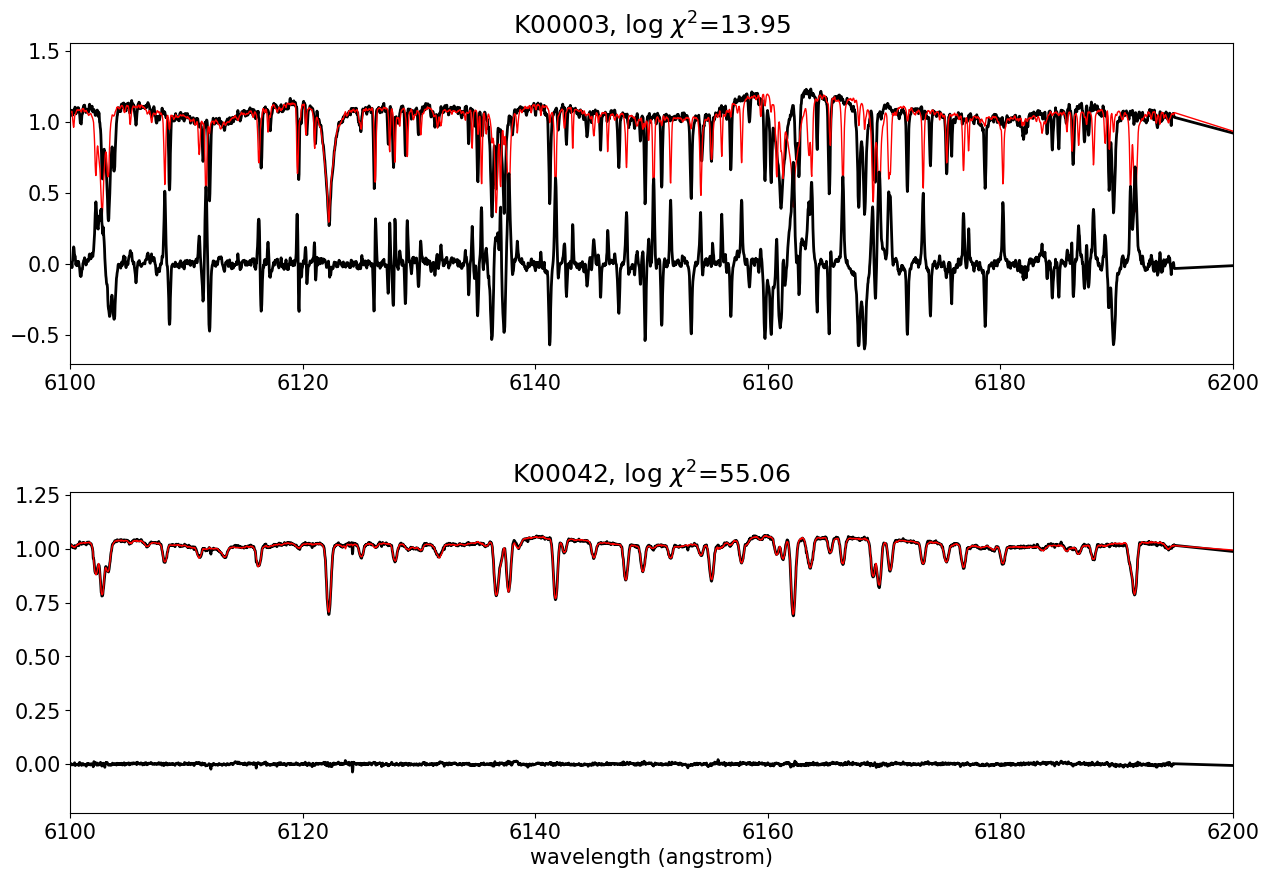

In [10]:
# spcetrum with large chisq has large residuals at ~6300angstrom
figure(figsize=(15,10));subplots_adjust(hspace=0.4)
subplot(211);title(normal_chisq_str)
plot(normal_chisq_spec.w, normal_chisq_spec.flux, color='k', lw=2)
plot(normal_chisq_spec.w, model(normal_chisq_spec.fit_cannon_labels), 'r-', lw=1)
plot(normal_chisq_spec.w, normal_chisq_spec.flux - model(normal_chisq_spec.fit_cannon_labels), 
     color='k', lw=2)
xlim(6100,6200)

subplot(212);title(large_chisq_str)
plot(large_chisq_spec.w, large_chisq_spec.flux, color='k', lw=2)
plot(large_chisq_spec.w, model(large_chisq_spec.fit_cannon_labels), 'r-', lw=1)
plot(large_chisq_spec.w, large_chisq_spec.flux - model(large_chisq_spec.fit_cannon_labels), 
     color='k', lw=2)
xlim(6100,6200);xlabel('wavelength (angstrom)')

In [11]:
# interpretation: the poor fit in this case seems to be due to the shift of the spectrum?
# but why is it contained to a specific order?

(5200.0, 5208.0)

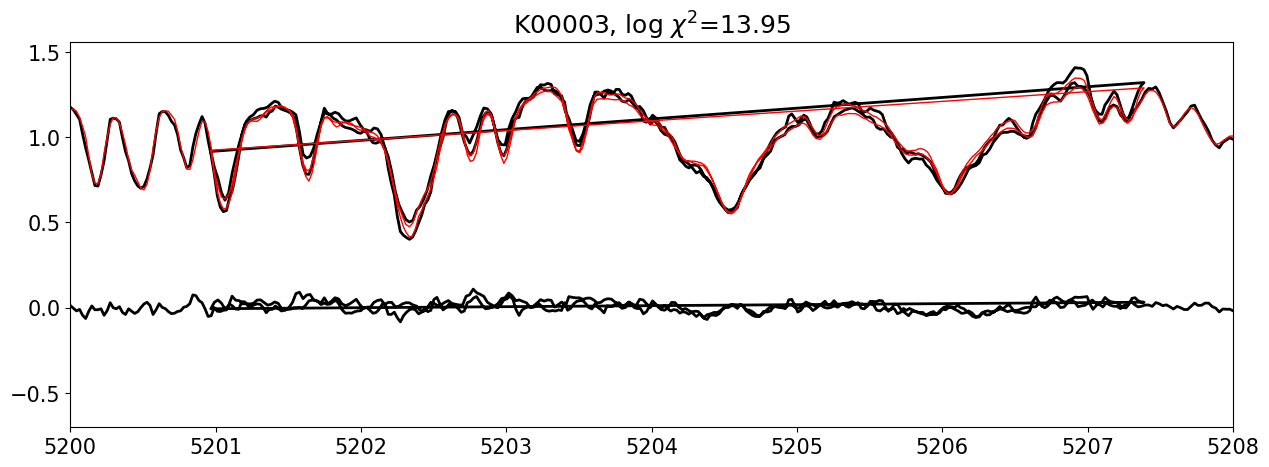

In [12]:
# next: it looks like there is some overlap in the orders
# for example, this is the border between order 3 and 4
# the infomrtion is being counted twice
# should I remove on of the overlapping parts, or simply clip the orders to not have
# any of these overlapping parts?
figure(figsize=(15,5))
title(normal_chisq_str)
plot(normal_chisq_spec.w, normal_chisq_spec.flux, color='k', lw=2)
plot(normal_chisq_spec.w, model(normal_chisq_spec.fit_cannon_labels), 'r-', lw=1)
plot(normal_chisq_spec.w, normal_chisq_spec.flux - model(normal_chisq_spec.fit_cannon_labels), 
     color='k', lw=2)
xlim(5200,5208)

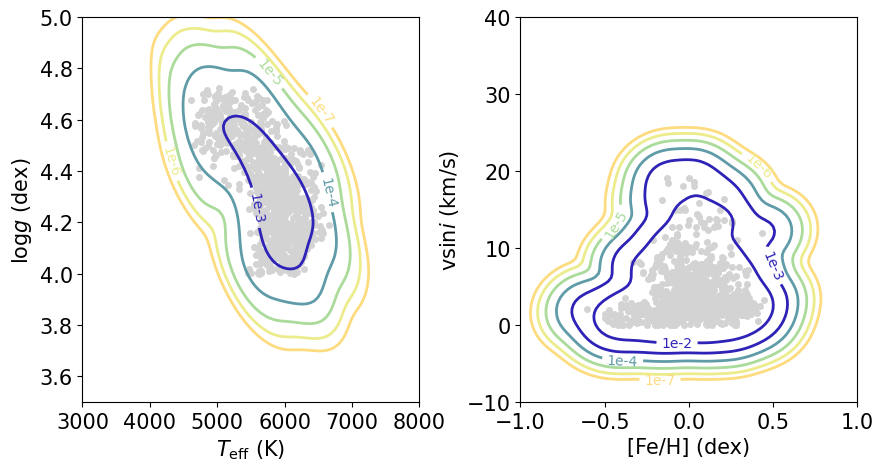

In [14]:
from scipy import stats
training_data = model.training_set_labels
training_density_kde = stats.gaussian_kde(training_data.T)
def training_density(param):
    density = training_density_kde(param)[0]
    return density

from matplotlib import cm, ticker

bounds = {'cks_steff':(3000,8000),
         'cks_slogg':(3.5,5.0),
         'cks_smet':(-1,1),
         'cks_svsini':(-10,40)}

axis_labels = {'cks_steff':r'$T_{\rm eff}$ (K)',
         'cks_slogg':r'log$g$ (dex)',
         'cks_smet':'[Fe/H] (dex)',
         'cks_svsini':r'vsin$i$ (km/s)'}

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap_colors= ['#2E22B7', '#70C6A2', '#E6F192', '#FDDB7F']
cmap = LinearSegmentedColormap.from_list("mycmap", cmap_colors[::-1])
training_label_names = ['cks_steff', 'cks_slogg','cks_smet', 'cks_svsini']
training_label_df = training_labels

def plot_kde(x, y, ax):
    
    retained_dim = (training_label_names.index(x), training_label_names.index(y))
    marginal_kde = training_density_kde.marginal(retained_dim) 

    xmin, xmax = bounds[x]
    ymin, ymax = bounds[y]

    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = np.reshape(marginal_kde(positions).T, X.shape)
    
    clevels = np.arange(-7,-1,1)
    strs = ['1e-7', '1e-6', '1e-5', '1e-4', '1e-3', '1e-2']
    
    ax.plot(training_label_df[x], training_label_df[y],'o', color='lightgrey', ms=4)
    contour_plot = ax.contour(np.log10(Z).T,extent=[xmin, xmax, ymin, ymax], 
                           cmap=cmap, levels=clevels,
                             vmin=-7,vmax=-3, linewidths = 2*np.ones(len(clevels)))
    ax.set_xlim([xmin, xmax]);ax.set_ylim([ymin, ymax])

    fmt = {}
    for l, s in zip(contour_plot.levels, strs):
        fmt[l] = s
    ax.clabel(contour_plot, contour_plot.levels[::1], inline=True, fontsize=10, fmt=fmt)
    ax.set_xlabel(axis_labels[x])
    ax.set_ylabel(axis_labels[y])

rcParams['font.size']=15
fig, axes = plt.subplots(1,2, figsize=(10,5))
subplots_adjust(wspace=0.3)

plot_kde('cks_steff', 'cks_slogg', axes[0])
plot_kde('cks_smet', 'cks_svsini', axes[1])